In [1]:
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_linear(data_ref: np.ndarray, data_in: np.ndarray, alpha: float, n_itr: int) -> np.ndarray:
    """
    Esse método processa a soma do erro quadrático dos valores de referência em relação ao valores da minha hipótese.
    Hipótese:
        data_hip = teta0 + teta1 * data_in
    """
    # inicialização de teta0 e teta1
    teta0 = 0.
    teta1 = 1.
    flag = True
    i = 0
    while i < n_itr:
        data_hip = teta0 + teta1 * data_in
        der0 = np.sum((data_hip - data_ref))/data_in.size
        der1 = np.sum((data_hip - data_ref)*data_in)/data_in.size
        tmp0 = teta0 - alpha* der0
        tmp1 = teta1 - alpha* der1
        teta0 = tmp0
        teta1 = tmp1
        i += 1
    return np.array([teta0, teta1])

In [3]:
def linear_regression(kick: np.ndarray, alpha: float = 0.1, n_itr: int = 10000) -> None:
    """
    Esse método é responsável por fazer o cálculo dos valores de teta(z), teta(x) e teta(y) da regressão linear utilizando também o cálculo do gradiente descendente.
    Aqui farei o uso da seguinte hipótese das variáveis x e z (que são as duas das coordenadas do centro da bola) em função da variável y (a ultima coordenada da bola):
    hx_teta(t) = tetax0 + tetax1 * y
    hz_teta(t) = tetaz0 + tetaz1 * y

    Parametros:
    kick(np.ndarray): dados de referência das coordenadas da bola
    """
    x = kick[:,0]
    y = kick[:,1]
    z = kick[:,2]
    teta = np.ndarray(shape=(2,2),)
    teta[0,:] = gradient_descent_linear(data_ref=x,data_in=y,alpha=alpha,n_itr=n_itr)
    teta[1,:] = gradient_descent_linear(data_ref=z,data_in=y,alpha=alpha,n_itr=n_itr)
    plot_3d(kick=kick,teta= teta)

In [10]:
def plot_3d(kick: np.ndarray, teta: np.ndarray):
    fig = plt.figure()
    # plot do ch
    ax = fig.add_subplot(121,projection='3d')
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2.1,2))
    Z =  np.zeros(X.shape)
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2])
    lin = np.linspace(-1,2.1,2)
    ax.plot(linear_func(lin,teta[0,:]),lin,linear_func(lin,teta[1,:]),c='r')
    ax.view_init(30, 10)

    ax = fig.add_subplot(122,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2])
    ax.plot(linear_func(lin,teta[0,:]),lin,linear_func(lin,teta[1,:]),c='r')
    ax.view_init(30, 75)

def linear_func(data_in: np.ndarray, teta: np.ndarray) -> np.ndarray:
    return teta[0] + teta[1]*data_in

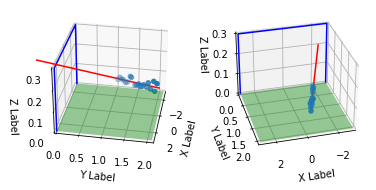

In [13]:
kick1 = np.loadtxt("kick1.dat")
linear_regression(kick=kick1,alpha=0.1,n_itr=100000)

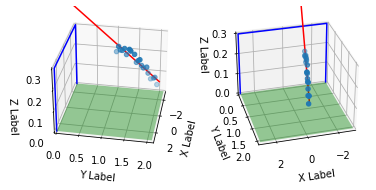

In [12]:
kick2 = np.loadtxt("kick2.dat")
linear_regression(kick=kick2,alpha=0.01,n_itr=100000)